In [22]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [39]:
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Part 1

In [28]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)


### Function description
This function takes the FASTA file path and extracts each DNA sequence entry from it. 
It used Biopython's `SeqIO.parse`to record the every unit penguin's sequence information and construct a dictionary.

The arguments are the input file path.
And the return type is a dictionary(`sequence_data_dict`), which included "key: species_name" and "Value: DNA sequence".

# ——————————————————————————————

# Part 2

In [29]:
def translate_function(dna_seq):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq = ""
    for i in range(0, len(dna_seq) - 2, 3): #-2 is to prevent the final number from being less than 3
        codon = str(dna_seq[i:i+3]) 
        
        #Check if it is a stop codon
        if codon in mito_table.stop_codons:
            break 
            
        if codon in mito_table.forward_table:
            aa = mito_table.forward_table[codon]
        else:
            aa = "X"
            
        aa_seq += aa
    return aa_seq

### Function description

Manually translates a DNA sequence into amino acids using the vertebrate mitochondrial codon table.  
Stops at stop codon. Returns the amino acid sequence as a string.

# ——————————————————————————————

# Part 3

In [34]:
def biopython_translate_function(dna_seq):
    from Bio.Seq import Seq
    seq_obj = Seq(dna_seq)
    aa_seq = seq_obj.translate(table="Vertebrate Mitochondrial", to_stop=True)
    return str(aa_seq)

### Function description

Uses Biopython's built-in .translate() with the mitochondrial codon table.  
Stops at the first stop codon. Returns amino acid sequence as a string.

> Translation method adapted with the assistance of OpenAI ChatGPT (May 2025), including the use of `Bio.Seq.Seq` to enable `.translate()` in Biopython.

# ——————————————————————————————

# Part 4

In [35]:
def compute_molecular_weight(aa_seq):
    aa_seq = str(aa_seq)
    analysis = ProteinAnalysis(aa_seq)
    weight = analysis.molecular_weight()
    return weight

### Function: compute_molecular_weight(aa_seq)

Calculates the molecular weight of an amino acid sequence using Biopython's `ProteinAnalysis` class.  
Requires input to be a string of standard amino acid one-letter codes.  
> ProteinAnalysis and `molecular_weight()` used per ChatGPT (OpenAI, May 2025) suggestion, adapted from Biopython's ProtParam module: https://biopython.org/wiki/ProtParam


# ——————————————————————————————

# Part 5

In [37]:
def gc_content(dna_seq):
    
    g_count = dna_seq.count("G")
    c_count = dna_seq.count("C")
    
    total = len(dna_seq)
    
    return (g_count + c_count) / total

# —————————————————————————————
# —————————————MAIN——————————————

In [ ]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

# Part 6 

In [40]:
penguins_df["molecular_weight"] = np.nan
penguins_df["gc_content"] = np.nan
penguins_df.head()

,species,mass,molecular_weight,gc_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN


### Step 6: Add empty columns

Add 'molecular_weight' and 'gc_content' columns to the penguin DataFrame, initialized with NaN.


# ——————————————————————————————

# Part 7 

In [43]:
for species in penguins_df["species"]:
    dna_seq = cytb_seqs.get(species)

    if dna_seq is not None:
        aa_seq = biopython_translate_function(dna_seq)

        weight = compute_molecular_weight(aa_seq)
        gc = gc_content(dna_seq)

        penguins_df.loc[penguins_df["species"] == species, "molecular_weight"] = weight
        penguins_df.loc[penguins_df["species"] == species, "gc_content"] = gc
    else:
        print(f"Warning: No sequence found for {species}")
        
penguins_df.head()

,species,mass,molecular_weight,gc_content
0,Aptenodytes forsteri,28.00,42459.6021,0.483815
1,Aptenodytes patagonicus,13.40,42563.7067,0.496938
2,Eudyptes chrysocome,2.80,42475.5753,0.511811
3,Eudyptes chrysolophus,4.50,42445.5493,0.509186
4,Eudyptes sclateri,4.25,42475.5753,0.508311


### Step 7: Populate new columns

For each species in the DataFrame, use the functions defined above to compute molecular weight and GC content.  
> Row-matching and DataFrame insertion logic written with ChatGPT (OpenAI, May 2025).


# ——————————————————————————————

# Part 8

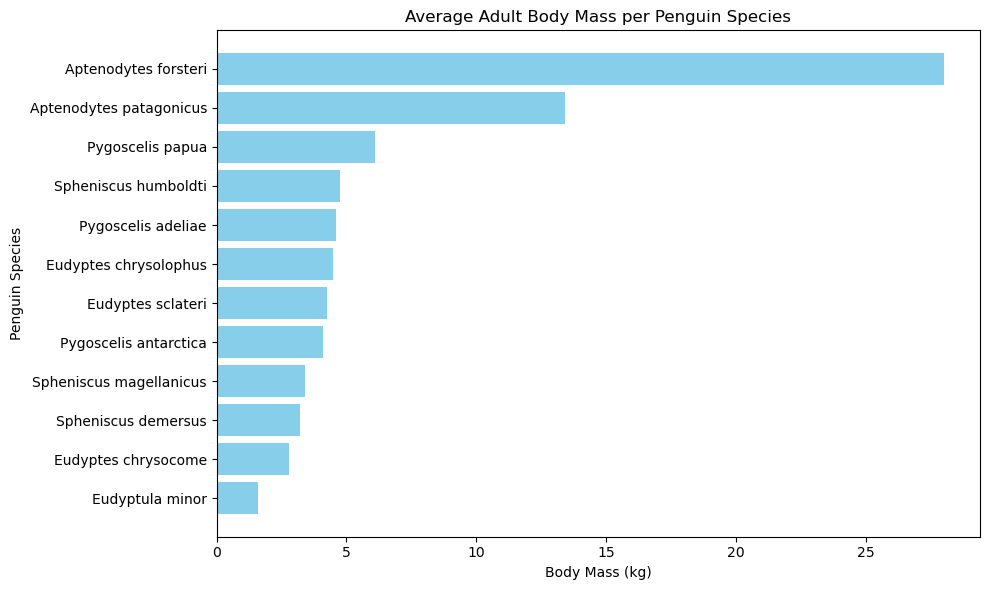

In [44]:

sorted_df = penguins_df.sort_values("mass")

plt.figure(figsize=(10, 6))
plt.barh(sorted_df["species"], sorted_df["mass"], color="skyblue")
plt.xlabel("Body Mass (kg)")  
plt.ylabel("Penguin Species")
plt.title("Average Adult Body Mass per Penguin Species")
plt.tight_layout()
plt.show()


### Step 8: Body Mass Bar Chart

We use the `penguins_df` DataFrame to plot adult body mass for each species.

### Answer: The smallest penguin species is *Eudyptula minor*, which inhabits coastal New Zealand and southern Australia.


# ——————————————————————————————

# Part 9

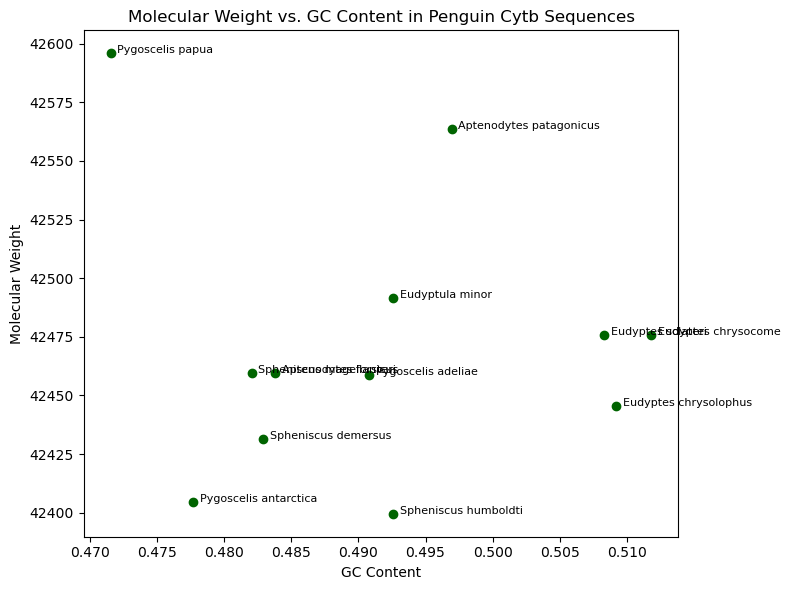

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(penguins_df["gc_content"], penguins_df["molecular_weight"], color="darkgreen")
plt.xlabel("GC Content")
plt.ylabel("Molecular Weight")
plt.title("Molecular Weight vs. GC Content in Penguin Cytb Sequences")

for i, row in penguins_df.iterrows():
    plt.text(row["gc_content"] + 0.0005, row["molecular_weight"], row["species"], fontsize=8)

plt.tight_layout()
plt.show()


# ——————————————————————————————

# Part 10

In [45]:
penguins_df.to_csv("penguins_mass_cytb.csv", index=False)

# ——————————————————————————————

# Part 11

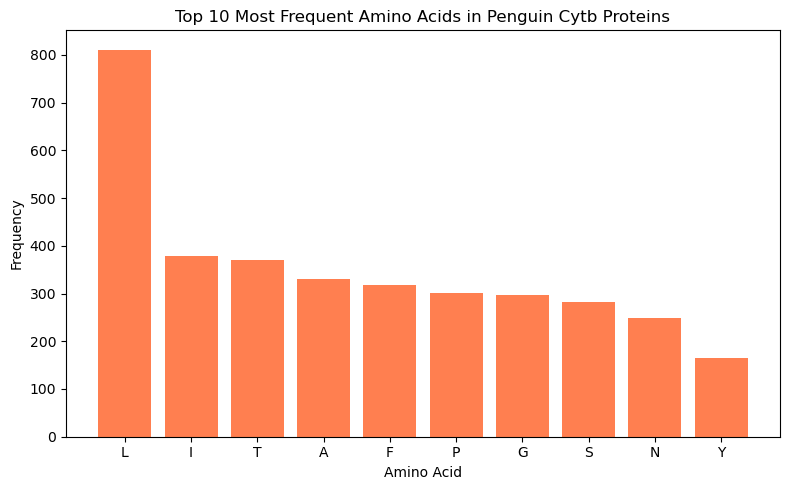

In [47]:
from collections import Counter

aa_counter = Counter()

for seq in cytb_seqs.values():
    aa_seq = biopython_translate_function(seq)
    aa_counter.update(aa_seq)


most_common_aas = aa_counter.most_common(10)
aa_labels, aa_counts = zip(*most_common_aas)

plt.figure(figsize=(8, 5))
plt.bar(aa_labels, aa_counts, color="coral")
plt.xlabel("Amino Acid")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Amino Acids in Penguin Cytb Proteins")
plt.tight_layout()
plt.show()


### Step 11: Bonus – Amino Acid Frequency Analysis

We analyze the most frequent amino acids across all penguin cytb protein sequences.  
This gives insight into sequence composition beyond GC content.  